# DSE 230 Final Project - Price vs Ratings Analysis
1. Preprocessing jsonl data
2. Initializing data into notebook
3. Data exploration
4. Analysis
   * Return on Rating
   * Fitting linear regression model

# 1. Preprocessing jsonl files
File path to files need to be rewritten as needed

* Reviews have `images` dropped and `image_count` created
* Items have `images`, `videos`, `details` dropped and `image_count`, `video_count`, `detail_count` created

In [ ]:
import json
import os
import pandas as pd

In [ ]:
# All Beauty Reviews
all_beauty_reviews = '/home/work/Final Project/(review) All_Beauty.jsonl/All_Beauty.jsonl'
# all beauty items
all_beauty_items = '/home/work/Final Project/(items) meta_All_Beauty.jsonl/meta_All_Beauty.jsonl'

# beauty and personal care Reviews
beauty_and_personal_care_reviews = '/home/work/Final Project/Beauty_and_Personal_Care.jsonl/Beauty_and_Personal_Care.jsonl'
# beauty and personal care items
beauty_and_personal_care_items = '/home/work/Final Project/meta_Beauty_and_Personal_Care.jsonl/meta_Beauty_and_Personal_Care.jsonl'

#### All Beauty Reviews

In [ ]:
with open(all_beauty_reviews, 'r') as infile:
  print('opened')
  for line_num, line in enumerate(infile, 1):
    try:
        json.loads(line)
    except json.JSONDecodeError as e:
        print(f"Error on line {line_num}: {e}")
        print(f"Problematic line content: {line.strip()}")

In [ ]:
keys_to_remove = {"images"}

with open(all_beauty_reviews, 'r') as infile, open('all_beauty_reviews_cleaned.jsonl', 'w') as outfile:
  for line in infile:
        try:
            obj = json.loads(line)

            # Initialize image count
            image_count = 0

            # Check if 'images' key exists and is a list
            if 'images' in obj and isinstance(obj['images'], list):
                image_count = len(obj['images'])

            cleaned_obj = {k: v for k, v in obj.items() if k not in keys_to_remove}

            # Add the image count as a new key
            cleaned_obj['image_count'] = image_count

            outfile.write(json.dumps(cleaned_obj) + '\n')

        except json.JSONDecodeError as e:
            print(f"Skipping line due to JSONDecodeError: {e} in line: {line.strip()}")
            # Attempt to fix the line (example: replacing single backslashes with double backslashes)
            corrected_line = line.strip().replace('\\', '\\\\')
            try:
                obj = json.loads(corrected_line)
                image_count = 0
                if 'images' in obj and isinstance(obj['images'], list):
                    image_count = len(obj['images'])
                cleaned_obj = {k: v for k, v in obj.items() if k not in keys_to_remove}
                cleaned_obj['image_count'] = image_count
                outfile.write(json.dumps(cleaned_obj) + '\n')
                print(f"Successfully processed corrected line.")
            except json.JSONDecodeError as e_corrected:
                print(f"Failed to process corrected line: {e_corrected} in line: {corrected_line}")
                # If correction fails, you might skip the line or log it for manual inspection

In [ ]:
cleaned_df = pd.read_json('/home/work/Final Project/all_beauty_reviews_cleaned.jsonl', lines=True)
cleaned_df.head(5)

In [ ]:
# get info about json file
all_beauty_df = pd.read_json(all_beauty_reviews, lines=True)
all_beauty_df.info()

In [ ]:
# info about json file after removing image key
cleaned_df.info()

In [ ]:
all_beauty_df.schema == cleaned_df.schema   # should return True

#### All Beauty Items

In [ ]:
keys_to_remove = {"images", 'videos', 'details', 'bought_together'}
# did i also delete author and subtitle accidentally? 

with open(all_beauty_items, 'r') as infile, open('all_beauty_items_cleaned.jsonl', 'w') as outfile:
  for line in infile:
        try:
            obj = json.loads(line)

            # Initialize counts
            image_count = 0
            video_count = 0
            detail_count = 0

            # Check if 'images' key exists and is a list
            if 'images' in obj and isinstance(obj['images'], list):
                image_count = len(obj['images'])

            # check if 'videos' key exists and is a list
            if 'videos' in obj and isinstance(obj['videos'], list):
                video_count = len(obj['videos'])

            # check if 'detail' key exists and is a list
            if 'details' in obj and isinstance(obj['details'], list):
                detail_count = len(obj['details'])

            cleaned_obj = {k: v for k, v in obj.items() if k not in keys_to_remove}

            # Add the image count as a new key
            cleaned_obj['image_count'] = image_count

            # Add the video count as a new key
            cleaned_obj['video_count'] = video_count

            # Add the detail count as a new key
            cleaned_obj['detail_count'] = detail_count

            outfile.write(json.dumps(cleaned_obj) + '\n')

        except json.JSONDecodeError as e:
            print(f"Skipping line due to JSONDecodeError: {e} in line: {line.strip()}")
            # Attempt to fix the line (example: replacing single backslashes with double backslashes)
            corrected_line = line.strip().replace('\\', '\\\\')
            try:
                obj = json.loads(corrected_line)
                image_count = 0
                video_count = 0
                detail_count = 0
                if 'images' in obj and isinstance(obj['images'], list):
                    image_count = len(obj['images'])
                if 'videos' in obj and isinstance(obj['videos'], list):
                    video_count = len(obj['videos'])
                if 'details' in obj and isinstance(obj['details'], list):
                    detail_count = len(obj['details'])
                cleaned_obj = {k: v for k, v in obj.items() if k not in keys_to_remove}
                cleaned_obj['image_count'] = image_count
                cleaned_obj['video_count'] = video_count
                cleaned_obj['detail_count'] = detail_count
                outfile.write(json.dumps(cleaned_obj) + '\n')
                print(f"Successfully processed corrected line.")
            except json.JSONDecodeError as e_corrected:
                print(f"Failed to process corrected line: {e_corrected} in line: {corrected_line}")
                # If correction fails, you might skip the line or log it for manual inspection

In [ ]:
# get info about json file
all_beauty_items_df = pd.read_json(all_beauty_items, lines=True)
all_beauty_items_df.head(5)

In [ ]:
all_beauty_items_df.info()

In [ ]:
all_beauty_items_cleaned_df = pd.read_json('/home/work/Final Project/all_beauty_items_cleaned.jsonl', lines=True)
all_beauty_items_cleaned_df.info()

In [ ]:
all_beauty_items_cleaned_df.head(5)

#### Beauty and Personal Care Reviews

In [ ]:
keys_to_remove = {"images"}

with open(beauty_and_personal_care_reviews, 'r') as infile, open('bapc_reviews_cleaned.jsonl', 'w') as outfile:
  for line in infile:
        try:
            obj = json.loads(line)

            # Initialize image count
            image_count = 0

            # Check if 'images' key exists and is a list
            if 'images' in obj and isinstance(obj['images'], list):
                image_count = len(obj['images'])

            cleaned_obj = {k: v for k, v in obj.items() if k not in keys_to_remove}

            # Add the image count as a new key
            cleaned_obj['image_count'] = image_count

            outfile.write(json.dumps(cleaned_obj) + '\n')

        except json.JSONDecodeError as e:
            print(f"Skipping line due to JSONDecodeError: {e} in line: {line.strip()}")
            # Attempt to fix the line (example: replacing single backslashes with double backslashes)
            corrected_line = line.strip().replace('\\', '\\\\')
            try:
                obj = json.loads(corrected_line)
                image_count = 0
                if 'images' in obj and isinstance(obj['images'], list):
                    image_count = len(obj['images'])
                cleaned_obj = {k: v for k, v in obj.items() if k not in keys_to_remove}
                cleaned_obj['image_count'] = image_count
                outfile.write(json.dumps(cleaned_obj) + '\n')
                print(f"Successfully processed corrected line.")
            except json.JSONDecodeError as e_corrected:
                print(f"Failed to process corrected line: {e_corrected} in line: {corrected_line}")
                # If correction fails, you might skip the line or log it for manual inspection

In [ ]:
bapc_reviews_cleaned_df = pd.read_json('/home/work/Final Project/meta_bapc_reviews_cleaned.jsonl', lines=True)

In [ ]:
bapc_reviews_cleaned_df.head(5)

#### Beauty and Personal Care Items

In [ ]:
keys_to_remove = {"images", 'videos', 'details', 'bought_together'}


with open(beauty_and_personal_care_items, 'r') as infile, open('bapc_items_cleaned.jsonl', 'w') as outfile:
  for line in infile:
        try:
            obj = json.loads(line)

            # Initialize counts
            image_count = 0
            video_count = 0
            detail_count = 0

            # Check if 'images' key exists and is a list
            if 'images' in obj and isinstance(obj['images'], list):
                image_count = len(obj['images'])

            # check if 'videos' key exists and is a list
            if 'videos' in obj and isinstance(obj['videos'], list):
                video_count = len(obj['videos'])

            # check if 'detail' key exists and is a list
            if 'details' in obj and isinstance(obj['details'], list):
                detail_count = len(obj['details'])

            cleaned_obj = {k: v for k, v in obj.items() if k not in keys_to_remove}

            # Add the image count as a new key
            cleaned_obj['image_count'] = image_count

            # Add the video count as a new key
            cleaned_obj['video_count'] = video_count

            # Add the detail count as a new key
            cleaned_obj['detail_count'] = detail_count

            outfile.write(json.dumps(cleaned_obj) + '\n')

        except json.JSONDecodeError as e:
            print(f"Skipping line due to JSONDecodeError: {e} in line: {line.strip()}")
            # Attempt to fix the line (example: replacing single backslashes with double backslashes)
            corrected_line = line.strip().replace('\\', '\\\\')
            try:
                obj = json.loads(corrected_line)
                image_count = 0
                video_count = 0
                detail_count = 0
                if 'images' in obj and isinstance(obj['images'], list):
                    image_count = len(obj['images'])
                if 'videos' in obj and isinstance(obj['videos'], list):
                    video_count = len(obj['videos'])
                if 'details' in obj and isinstance(obj['details'], list):
                    detail_count = len(obj['details'])
                cleaned_obj = {k: v for k, v in obj.items() if k not in keys_to_remove}
                cleaned_obj['image_count'] = image_count
                cleaned_obj['video_count'] = video_count
                cleaned_obj['detail_count'] = detail_count
                outfile.write(json.dumps(cleaned_obj) + '\n')
                print(f"Successfully processed corrected line.")
            except json.JSONDecodeError as e_corrected:
                print(f"Failed to process corrected line: {e_corrected} in line: {corrected_line}")
                # If correction fails, you might skip the line or log it for manual inspection

In [ ]:
bapc_items_df = pd.read_json(beauty_and_personal_care_items, lines=True)
bapc_items_df.head(5)

In [ ]:
bapc_items_df.info()

In [ ]:
bapc_items_cleaned_df = pd.read_json('/home/work/Final Project/bapc_items_cleaned.jsonl', lines=True)

In [ ]:
bapc_items_cleaned_df.info()

# 2. Initializing Data into Notebook

Dataset: https://amazon-reviews-2023.github.io/

PySpark: https://spark.apache.org/docs/latest/api/python/index.html

Matplotlib: https://matplotlib.org/stable/users/index

* Suppress native-hadoop warning
* Import packages
* Initialize Spark session
* Load files into HDFS
* Load files into dataframes

In [1]:
# Suppress native-hadoop warning
!sed -i '$a\# Add the line for suppressing the NativeCodeLoader warning \nlog4j.logger.org.apache.hadoop.util.NativeCodeLoader=ERROR,console' /$HADOOP_HOME/etc/hadoop/log4j.properties

In [54]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, from_unixtime, to_timestamp, rand, when, isnull, stddev, avg, round, count, format_number
from pyspark.sql.types import NumericType

from pyspark import StorageLevel

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import time
import datetime

In [3]:
notebook_start = time.time()

In [4]:
conf = pyspark.SparkConf().setAll([
('spark.master', 'local[4]'),
('spark.app.name', 'App Name'),
('spark.executor.memory','8g'),
('spark.driver.memory','8g'),
('spark.kryoserializer.buffer.max','512m')])
spark = SparkSession.builder.config(conf=conf).getOrCreate()

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 37412)
Traceback (most recent call last):
  File "/usr/lib/python3.11/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.11/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.11/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.11/socketserver.py", line 755, in __init__
    self.handle()
  File "/usr/local/lib/python3.11/dist-packages/pyspark/accumulators.py", line 295, in handle
    poll(accum_updates)
  File "/usr/local/lib/python3.11/dist-packages/pyspark/accumulators.py", line 267, in poll
    if self.rfile in r and func():
                           ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pyspark/accumulators.py", line 271, in accum_u

In [5]:
start_time = time.time()
! pwd
! hdfs dfs -mkdir /finalproject

! hdfs dfs -copyFromLocal all_beauty_items_cleaned.jsonl /finalproject
print(time.time() - start_time)
! hdfs dfs -copyFromLocal all_beauty_reviews_cleaned.jsonl /finalproject
print(time.time() - start_time)
! hdfs dfs -copyFromLocal bapc_items_cleaned.jsonl /finalproject
print(time.time() - start_time)
! hdfs dfs -copyFromLocal bapc_reviews_1m.jsonl /finalproject

exec_time = time.time() - start_time
print('time (s) to load files into hdfs:', exec_time)

/home/work/Final Project
mkdir: `/finalproject': File exists
copyFromLocal: `/finalproject/all_beauty_items_cleaned.jsonl': File exists
9.175012350082397
copyFromLocal: `/finalproject/all_beauty_reviews_cleaned.jsonl': File exists
13.064217329025269
copyFromLocal: `/finalproject/bapc_items_cleaned.jsonl': File exists
17.098875761032104
copyFromLocal: `/finalproject/bapc_reviews_1m.jsonl': File exists
time (s) to load files into hdfs: 21.026116847991943


In [6]:
all_beauty_items_df = spark.read.json('hdfs://localhost:9000/finalproject/all_beauty_items_cleaned.jsonl')
all_beauty_reviews_df = spark.read.json('hdfs://localhost:9000/finalproject/all_beauty_reviews_cleaned.jsonl')
bapc_reviews_df = spark.read.json('hdfs://localhost:9000/finalproject/bapc_reviews_1m.jsonl')
bapc_items_df = spark.read.json('hdfs://localhost:9000/finalproject/bapc_items_cleaned.jsonl')

In [7]:
bapc_items_df = bapc_items_df.drop('author', 'subtitle')

In [8]:
bapc_items_df = bapc_items_df.withColumn('price', col('price').cast('double'))

In [9]:
all_beauty_items_df.schema == bapc_items_df.schema

True

# 3. Data Exploration

* Union into one reviews dataframe
* show() and printSchema() for EDA
* Join into one total dataframe called `df`
* count()

In [10]:
if all_beauty_reviews_df.schema == bapc_reviews_df.schema:
    review_df = all_beauty_reviews_df.union(bapc_reviews_df)
else:
    print('columns don''t match, cannot union')

In [11]:
# skip cell execution as long as bapc_items_df doesn't exist
try:
    if all_beauty_items_df.schema == bapc_items_df.schema:
        item_df = all_beauty_items_df.union(bapc_items_df)
    else:
        print('columns are different')
except NameError:
    item_df = all_beauty_items_df
    print('item_df is all_beauty items only')

In [12]:
item_df = item_df.withColumnsRenamed({
    'title': 'item_name',
    'image_count': 'item_image_count'
    })

In [13]:
item_df.show(1)

# Most helpful columns: main_category ('All Beauty' or 'Beauty and Personal Care'), title, average_rating, rating_number, store, categories

+--------------+----------+-----------+------------+--------+----------------+-------------+-----------+-----+-------------+---------------+--------------------+-----------+
|average_rating|categories|description|detail_count|features|item_image_count|main_category|parent_asin|price|rating_number|          store|           item_name|video_count|
+--------------+----------+-----------+------------+--------+----------------+-------------+-----------+-----+-------------+---------------+--------------------+-----------+
|           4.8|        []|         []|           0|      []|               2|   All Beauty| B01CUPMQZE| NULL|           10|Howard Products|Howard LC0008 Lea...|          0|
+--------------+----------+-----------+------------+--------+----------------+-------------+-----------+-----+-------------+---------------+--------------------+-----------+
only showing top 1 row



In [14]:
item_df.printSchema()

root
 |-- average_rating: double (nullable = true)
 |-- categories: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- description: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- detail_count: long (nullable = true)
 |-- features: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- item_image_count: long (nullable = true)
 |-- main_category: string (nullable = true)
 |-- parent_asin: string (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_number: long (nullable = true)
 |-- store: string (nullable = true)
 |-- item_name: string (nullable = true)
 |-- video_count: long (nullable = true)



In [15]:
review_df.show(5)

# Most helpful columns: helpful_vote, rating, text, timestamp, title

+----------+------------+-----------+-----------+------+--------------------+-------------+--------------------+--------------------+-----------------+
|      asin|helpful_vote|image_count|parent_asin|rating|                text|    timestamp|               title|             user_id|verified_purchase|
+----------+------------+-----------+-----------+------+--------------------+-------------+--------------------+--------------------+-----------------+
|B00YQ6X8EO|           0|          0| B00YQ6X8EO|   5.0|This spray is rea...|1588687728923|Such a lovely sce...|AGKHLEW2SOWHNMFQI...|             true|
|B081TJ8YS3|           1|          0| B081TJ8YS3|   4.0|This product does...|1588615855070|Works great but s...|AGKHLEW2SOWHNMFQI...|             true|
|B07PNNCSP9|           2|          0| B097R46CSY|   5.0|Smells good, feel...|1589665266052|                Yes!|AE74DYR3QUGVPZJ3P...|             true|
|B09JS339BZ|           0|          0| B09JS339BZ|   1.0|      Felt synthetic|16433936302

In [16]:
review_df.printSchema()

root
 |-- asin: string (nullable = true)
 |-- helpful_vote: long (nullable = true)
 |-- image_count: long (nullable = true)
 |-- parent_asin: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- text: string (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- title: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- verified_purchase: boolean (nullable = true)



In [17]:
# changing price from string to double
item_df = item_df.withColumn('price', col('price').cast('double'))

In [18]:
item_df.filter(col('price').isNull()).count()

743203

In [19]:
item_df.filter(col('store').isNull()).count()

62041

In [20]:
item_df = item_df.na.fill({'price': 0, 'store': 'No store name', 'main_category': 'No category'})

In [21]:
# changing itmestamp datatype to datetime

review_df = review_df.withColumn('review_dttm', to_timestamp(from_unixtime(col('timestamp')/1000)))

In [22]:
item_df.count() #1,141,504

1141504

In [23]:
review_df.count() 

1701528

In [24]:
df = review_df.join(item_df, review_df.parent_asin == item_df.parent_asin, 'left').select(
    item_df.main_category, item_df.item_name, item_df.average_rating, item_df.rating_number
    , item_df.store, item_df.categories, item_df.price, item_df.description, item_df.features,
    item_df.item_image_count, item_df.video_count, item_df.detail_count,
    review_df.helpful_vote, review_df.rating, review_df.text, review_df.timestamp, review_df.review_dttm, review_df.title,
    review_df.image_count
)

In [25]:
df.count() # 1,701,528

1701528

In [26]:
df.show(1, truncate=False, vertical=True)

[Stage 34:==============>                                           (1 + 3) / 4]

-RECORD 0--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 main_category    | All Beauty                                                                                                                                                                                                                                                                                                                                                                                                                                                     
 item_name        | Herbivore - Natural Sea Mist Texturizing Sal

# 4. Price vs Rating Analysis
How price affects perception, hoping to bring value to business through strategic pricing

## Correlation heatmap

In [30]:
numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType)]
numeric_cols.remove('detail_count')

In [31]:
assembler = VectorAssembler(inputCols=numeric_cols, outputCol = 'assembled_features')
vector_df = assembler.transform(df).select('assembled_features')

corr_matrix = Correlation.corr(vector_df, 'assembled_features').head()[0].toArray()

corr_pd = pd.DataFrame(corr_matrix, index=numeric_cols, columns=numeric_cols)

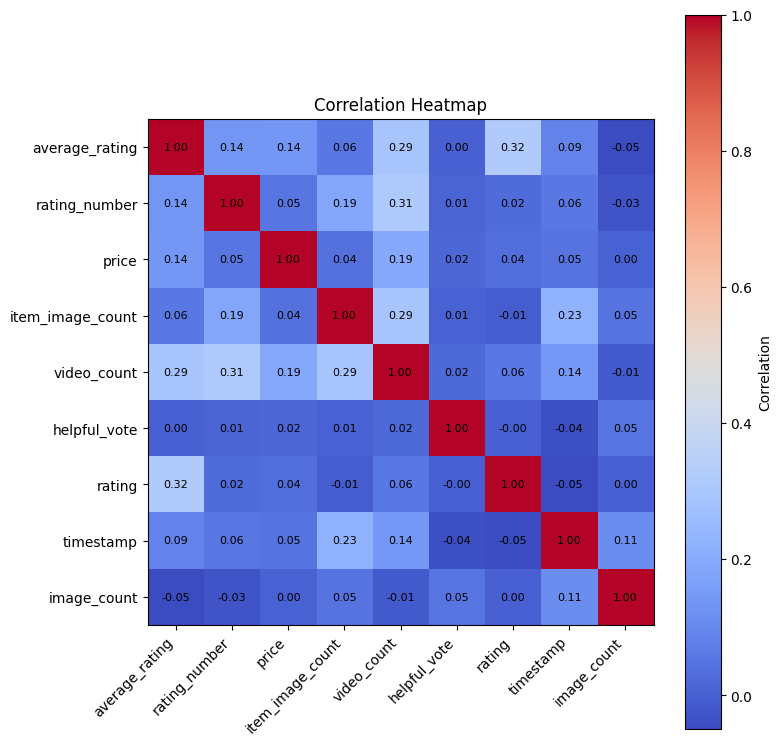

In [32]:
# mask = np.triu(np.ones_like(corr_pd, dtype=bool))
# masked_matrix = np.where(mask, np.nan, corr_pd)

plt.figure(figsize=(8,8))
# plt.imshow(masked_matrix, cmap='coolwarm', interpolation='nearest')
plt.imshow(corr_pd, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')

tick_marks = np.arange(len(corr_pd.columns))
plt.xticks(tick_marks, corr_pd.columns, rotation=45, ha='right')
plt.yticks(tick_marks, corr_pd.index)

for i in range(len(corr_pd)):
    for j in range(len(corr_pd.columns)):
        text = f'{corr_pd.iloc[i,j]:.2f}'
        plt.text(j, i, text, ha='center', va='center', color='black', fontsize=8)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Return on Ratings Analysis

In [33]:
# grouping price into bins and comparing ratings
price_group_df = df.withColumn(
    'price_group',
    when(df.price == 0.0, '0').
    when(df.price < 5, '< $5').
    when(df.price < 10, '$5 - $10').
    when(df.price < 20, '$10 - $20').
    when(df.price < 50, '$20 - $50').
    otherwise('> $50')
)

price_group_df = price_group_df.where(price_group_df.price_group != '0')
price_group_count = price_group_df.groupBy('price_group').agg(
    round(avg('average_rating'), 4).alias('avg_rating'),
    count('*').alias('count'))
# price_group_count = price_group_count \
#     .withColumnRenamed('avg(average_rating)', 'average_rating') \
#     .withColumnRenamed('count(1)', 'count')


price_group_count = price_group_count.withColumn(
    'sort_order',
    when(col('price_group') == '< $5', 1)
    .when(col('price_group') == '$5 - $10', 2)
    .when(col('price_group') == '$10 - $20', 3)
    .when(col('price_group') == '$20 - $50', 4)
    .when(col('price_group') == '> $50', 5)
    .otherwise(6)
)

price_group_count = price_group_count.orderBy('sort_order').drop('sort_order')

price_group_count.show()

[Stage 53:==============>                                           (1 + 3) / 4]

+-----------+----------+------+
|price_group|avg_rating| count|
+-----------+----------+------+
|       < $5|    4.3095| 33789|
|   $5 - $10|    4.3566|230291|
|  $10 - $20|    4.3807|302294|
|  $20 - $50|     4.403|246989|
|      > $50|     4.363| 54762|
+-----------+----------+------+



In [34]:
# which price ranges have highest variability in ratings?
price_group_stdev = price_group_df.groupBy('price_group').agg(stddev('average_rating'))
price_group_stdev = price_group_df.groupBy('price_group').agg(
    round(stddev('average_rating'), 4).alias('stdev_rating'))
# price_group_stdev = price_group_stdev.withColumnRenamed('stddev(average_rating)', 'stdev_rate_per_price')

price_group_stdev = price_group_stdev.withColumn(
    'sort_order',
    when(col('price_group') == '< $5', 1)
    .when(col('price_group') == '$5 - $10', 2)
    .when(col('price_group') == '$10 - $20', 3)
    .when(col('price_group') == '$20 - $50', 4)
    .when(col('price_group') == '> $50', 5)
    .otherwise(6)
)

price_group_stdev = price_group_stdev.orderBy('sort_order').drop('sort_order')

price_group_stdev.show()

[Stage 62:>                                                         (0 + 4) / 4]

+-----------+------------+
|price_group|stdev_rating|
+-----------+------------+
|       < $5|      0.3601|
|   $5 - $10|      0.3447|
|  $10 - $20|      0.3321|
|  $20 - $50|      0.3171|
|      > $50|      0.3706|
+-----------+------------+



## Regression Analysis

In [59]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator, BinaryClassificationEvaluator, MulticlassClassificationEvaluator

### Troubleshooting performance issues

In [36]:
train_df, test_df = df.randomSplit([0.65, 0.35], seed=42)

In [37]:
print(train_df.rdd.getNumPartitions())

[Stage 68:====================================================>   (13 + 1) / 14]

19


In [38]:
print(train_df.rdd.mapPartitions(lambda iter: [sum(1 for I in iter)]).collect())

[Stage 71:==================================================>     (17 + 2) / 19]

[60625, 62522, 60875, 63369, 61065, 61305, 59833, 59724, 58492, 61733, 63644, 58168, 61541, 58394, 62920, 61892, 62363, 58130, 10127]


In [39]:
train_df.persist(StorageLevel.MEMORY_AND_DISK)

DataFrame[main_category: string, item_name: string, average_rating: double, rating_number: bigint, store: string, categories: array<string>, price: double, description: array<string>, features: array<string>, item_image_count: bigint, video_count: bigint, detail_count: bigint, helpful_vote: bigint, rating: double, text: string, timestamp: bigint, review_dttm: timestamp, title: string, image_count: bigint]

In [40]:
train_df = train_df.coalesce(4)

In [41]:
train_df.count()

1106020

### Fitting model

In [42]:
# numeric_cols.remove('average_rating')
numeric_cols

['average_rating',
 'rating_number',
 'price',
 'item_image_count',
 'video_count',
 'helpful_vote',
 'rating',
 'timestamp',
 'image_count']

In [43]:
categoricals = ['main_category', 'store']
indexers = [StringIndexer(inputCol=c, outputCol=c+'_idx', handleInvalid='keep') for c in categoricals]
encoders = [OneHotEncoder(inputCol=c+'_idx', outputCol=c+'_vec', handleInvalid='keep') for c in categoricals]
# encoders = encoders.setHandleInvalid('keep')

In [44]:
assembler = VectorAssembler(
    inputCols=numeric_cols + [c+'_vec' for c in categoricals],
    outputCol='assembled_features'
)

lr = LinearRegression(featuresCol='assembled_features', labelCol='average_rating')
pipeline = Pipeline(stages=indexers + encoders + [assembler, lr])

In [45]:
# train_df.explain(True)

In [46]:
small_df = train_df.limit(1000000)
small_model = pipeline.fit(small_df)
# model = pipeline.fit(train_df)

### Making predictions and evaluating performance

In [56]:
# predictions = model.transform(test_df)
predictions = small_model.transform(test_df)

In [57]:
predictions.select(
    'average_rating','prediction'
).show(10)

[Stage 297:>                                                        (0 + 1) / 1]

+--------------+------------------+
|average_rating|        prediction|
+--------------+------------------+
|           4.1| 4.099998882392591|
|           4.1| 4.099998867862826|
|           4.2| 4.199999640374461|
|           4.2| 4.199999077081959|
|           4.2| 4.199999077923063|
|           3.9|3.8999989566474493|
|           4.2| 4.200001016036387|
|           4.2| 4.200001016800173|
|           4.3| 4.299999198760213|
|           4.4|4.3999997017050525|
+--------------+------------------+
only showing top 10 rows



In [48]:
rmse_eval = RegressionEvaluator(
    labelCol='average_rating',
    predictionCol='prediction',
    metricName='rmse'
)

rmse = rmse_eval.evaluate(predictions)
rmse
# lower is better

5.038797042016492e-07

In [49]:
mse_eval = RegressionEvaluator(
    labelCol='average_rating',
    predictionCol='prediction',
    metricName='mse'    
)

mse = mse_eval.evaluate(predictions)
mse
# lower is better

2.5389475630634154e-13

In [50]:
mae_eval = RegressionEvaluator(
    labelCol='average_rating',
    predictionCol='prediction',
    metricName='mae'
)

mae = mae_eval.evaluate(predictions)
mae
# lower is better

2.747568346524441e-07

In [51]:
r2_eval = RegressionEvaluator(
    labelCol='average_rating',
    predictionCol='prediction',
    metricName='r2'    
)

r2 = r2_eval.evaluate(predictions)
r2
# higher is better

0.9999999999989859

# Stop Spark session

In [52]:
#spark.stop()
print('time to execute entire notebook: ',time.time() - notebook_start)

time to execute entire notebook:  955.1867477893829
